In [51]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [52]:
# plot 한글출력
plt.rcParams['font.family'] = 'NanumGothic'

In [53]:
# warning message 제거
import warnings
warnings.filterwarnings('ignore')

In [54]:
staffs = pd.read_csv('../01.Data_Collection/staffs.csv')
writer_code = pd.read_csv('../01.Data_Collection/writer_code.csv')
writer_detail = pd.read_csv('../01.Data_Collection/writer_detail.csv')
boxoffice = pd.read_csv('../01.Data_Collection/boxoffice.csv')

print(staffs.shape)
print(writer_code.shape)
print(writer_detail.shape)
print(boxoffice.shape)

(107268, 4)
(1015, 5)
(12215, 6)
(802, 18)


In [55]:
print(staffs.isnull().sum())
staffs[staffs['peopleNm'] == '애덤 비첸']

movieCd        0
movieNm        0
peopleNm       0
staffRoleNm    0
dtype: int64


,movieCd,movieNm,peopleNm,staffRoleNm
15314,20100211,다이노 타임,애덤 비첸,시나리오(각본)


In [56]:
print(writer_code.isnull().sum())
writer_code[writer_code['repRoleNm'].isnull()]
# writer_code[writer_code['peopleNm'] == '애덤 비첸']
# writer_code['repRoleNm'].value_counts()

filmoNames    0
movieNm       0
peopleCd      0
peopleNm      0
repRoleNm     1
dtype: int64


,filmoNames,movieNm,peopleCd,peopleNm,repRoleNm
82,다이노 타임,다이노 타임,10045509,애덤 비첸,NaN


In [57]:
# 애덤 비첸 repRoleNm 채우기

writer_code.loc[writer_code['peopleNm'] == '애덤 비첸', 'repRoleNm'] = '시나리오(각본)'

writer_code.isnull().sum()

filmoNames    0
movieNm       0
peopleCd      0
peopleNm      0
repRoleNm     0
dtype: int64

# staffs - writer_code merge
movieNm peopleNm 으로 merge

In [102]:
# staffs 테이블에서 각본가만 따로 저장
# staffs 테이블에서 중복 제거
staff_writer_only = staffs[staffs['staffRoleNm'] == '시나리오(각본)'].drop_duplicates()

print(staff_writer_only.shape)
staff_writer_only.sample()

(961, 4)


,movieCd,movieNm,peopleNm,staffRoleNm
46838,20158019,미스터 쿠퍼,오정미,시나리오(각본)


In [103]:
# writer_code 테이블에서 중복 제거
print(writer_code.shape)
writer_code = writer_code.drop_duplicates()

writer_list_count = pd.DataFrame(writer_code.groupby(['movieNm', 'peopleNm'])['peopleCd'].size())
print('2 번 이상 들어간 작가 수', len(writer_list_count[writer_list_count['peopleCd'] > 1]))
writer_list_count[writer_list_count['peopleCd'] > 1]

(1015, 5)
2 번 이상 들어간 작가 수 0


,,peopleCd
movieNm,peopleNm,


In [104]:
writer_code.shape

(961, 5)

In [110]:
writer_movie_code_merge = staff_writer_only.merge(writer_code, how='inner', on=['movieNm', 'peopleNm'])

print(writer_movie_code_merge.shape)
print(writer_movie_code_merge.isnull().sum())
writer_movie_code_merge.sample()

(961, 7)
movieCd        0
movieNm        0
peopleNm       0
staffRoleNm    0
filmoNames     0
peopleCd       0
repRoleNm      0
dtype: int64


,movieCd,movieNm,peopleNm,staffRoleNm,filmoNames,peopleCd,repRoleNm
661,20177266,나를 기억해,이한욱,시나리오(각본),나를 기억해|숨바꼭질,20178069,감독


## 위의 merge 한 테이블과 writer_detail 테이블 merge
movieCd, peopleCd

In [117]:
writer_movie_code_merge.sample()
writer_movie_code_merge.dtypes

movieCd         int64
movieNm        object
peopleNm       object
staffRoleNm    object
filmoNames     object
peopleCd        int64
repRoleNm      object
dtype: object

In [116]:
writer_detail.sample()
writer_detail.dtypes

movieCd        object
movieNm        object
moviePartNm    object
peopleCd        int64
peopleNm       object
sex            object
dtype: object

In [126]:
# writer_detail 의 movieCd 컬럼이 str 이라서 int 로 바꿔준다

# writer_detail['movieCd'] = writer_detail['movieCd'].apply(lambda x: int(x))
# writer_detail.dtypes

# writer_detail[writer_detail['movieCd'].apply(lambda x: x.isdigit())]

# writer_detail[writer_detail['movieCd'] == '2010G741']


# writer_movie_code_merge 의 movieCd 컬럼이 int 이라서 str 로 바꿔준다

writer_movie_code_merge['movieCd'] = writer_movie_code_merge['movieCd'].apply(lambda x: str(x))
writer_movie_code_merge.dtypes

movieCd        object
movieNm        object
peopleNm       object
staffRoleNm    object
filmoNames     object
peopleCd        int64
repRoleNm      object
dtype: object

In [128]:
writers_all = writer_movie_code_merge.merge(writer_detail, how='inner', on=['movieCd', 'peopleCd'])
writers_all.sample()

,movieCd,movieNm_x,peopleNm_x,staffRoleNm,filmoNames,peopleCd,repRoleNm,movieNm_y,moviePartNm,peopleNm_y,sex
170,20149062,연애의 맛,윤필준,시나리오(각본),"안시성|그래, 가족|연애의 맛|브라보 마이 라이프",20131355,시나리오(각본),연애의 맛,각색,윤필준,남자


In [134]:
# 다른 값 있는지 확인
# peopleNm 은 다른 값 있음, 활동명과 다른 이름인 것 같음, 일단 두개 다 남김

writers_all[writers_all['movieNm_x'] != writers_all['movieNm_y']]
writers_all[writers_all['peopleNm_x'] != writers_all['peopleNm_y']]

,movieCd,movieNm_x,peopleNm_x,staffRoleNm,filmoNames,peopleCd,repRoleNm,movieNm_y,moviePartNm,peopleNm_y,sex
711,20154910,터널,김성훈,시나리오(각본),백두산|PMC: 더 벙커|클로젯|신과함께-인과 연|1987|신과함께-죄와 벌|서서평...,10087253,배우,터널,배우,하정우,남자
712,20154910,터널,김성훈,시나리오(각본),백두산|PMC: 더 벙커|클로젯|신과함께-인과 연|1987|신과함께-죄와 벌|서서평...,10087253,배우,터널,배우,하정우,남자
806,20156559,계춘할망,창,시나리오(각본),PMC: 더 벙커|폴란드로 간 아이들|안시성|명당|마녀|챔피언|흥부: 글로 세상을 ...,10006001,편집,계춘할망,편집,김창주,남자
897,20158242,무서운 이야기 3 : 화성에서 온 소녀,김선,시나리오(각본),무서운 이야기 3 : 화성에서 온 소녀|무서운 이야기 3 '로드레이지',20258772,음악,무서운 이야기 3 : 화성에서 온 소녀,음악,김선경,여자
898,20158242,무서운 이야기 3 : 화성에서 온 소녀,김선,시나리오(각본),무서운 이야기 3 : 화성에서 온 소녀|무서운 이야기 3 '로드레이지',20258772,음악,무서운 이야기 3 : 화성에서 온 소녀,작사/작곡/편곡,김선경,여자
899,20158242,무서운 이야기 3 : 화성에서 온 소녀,김선,시나리오(각본),무서운 이야기 3 : 화성에서 온 소녀|무서운 이야기 3 '로드레이지',20258772,음악,무서운 이야기 3 : 화성에서 온 소녀,작사/작곡/편곡,김선경,여자
1735,20154427,불온한 당신,이영,시나리오(각본),불온한 당신,20301429,광고디자인,불온한 당신,광고디자인,이영선,여자
1736,20154427,불온한 당신,이영,시나리오(각본),불온한 당신,20301429,광고디자인,불온한 당신,광고디자인,이영선,여자


In [136]:
# movieNm 은 x, y 내용 같으므로 컬럼 하나만 남긴다

writers_all = writers_all.drop('movieNm_y', axis=1)

In [140]:
# 컬럼명 정리
# peopleNm_x -> writerNm 필명
# peopleNm_y -> peopleNm 영화인 이름
writers_all = writers_all.rename(columns={'movieNm_x':'movieNm', 'peopleNm_x':'writerNm', 'peopleNm_y':'peopleNm'})

writers_all.sample()

,movieCd,movieNm,writerNm,staffRoleNm,filmoNames,peopleCd,repRoleNm,moviePartNm,peopleNm,sex
1429,20157631,다른 길이 있다,조창호,시나리오(각본),다른 길이 있다|폭풍전야|피터팬의 공식|나쁜 남자|날아라 닭!|리틀 인디언 보이|판...,10067366,감독,감독,조창호,남자


# 영화별 개봉년도 컬럼 추가하기
boxoffice 테이블의 개봉일 컬럼 이용

In [293]:
# 영화명 중복값 있는지 확인
# boxoffice 테이블에는 movieCd 없기 때문에 영화명으로 찾아야 한다
data = pd.DataFrame(boxoffice['영화명'].value_counts().reset_index())

data[data['영화명'] > 1]

,index,영화명


In [298]:
# 개봉일에서 앞 4자리만 가져와서 개봉년도로 넣어준다
boxoffice['개봉년도'] = boxoffice['개봉일'].apply(lambda x: x[:4])
boxoffice.sample()

,순위,영화명,개봉일,매출액,매출액점유율,누적매출액,관객수,누적관객수,스크린수,상영횟수,대표국적,국적,제작사,배급사,등급,장르,감독,배우,개봉년도
349,68,레이디버그,2017.2.22,"310,291,500",0.0%,"310,291,500","41,041","41,041",172,"2,158",한국,"한국,프랑스,일본",(주)삼지애니메이션,(주)삼지애니메이션,전체관람가,"애니메이션,액션,어드벤처",장성,"여민정,남도형,홍시호,이민규",2017


In [304]:
# 영화명으로 writer_sex_ratio 테이블과 boxoffice['개봉년도']를 merge 해준다
data = writer_sex_ratio.merge(boxoffice[['영화명', '개봉년도']], how='left', left_on='movieNm', right_on='영화명')

data = data.drop('영화명', axis=1)
writer_sex_ratio = data.rename(columns={'개봉년도':'year'})

In [315]:
# 영화명으로 writer_sex_ratio 테이블과 boxoffice['개봉년도']를 merge 해준다
data = writers_all.merge(boxoffice[['영화명', '개봉년도']], how='left', left_on='movieNm', right_on='영화명')

data = data.drop('영화명', axis=1)
writers_all = data.rename(columns={'개봉년도':'year'})
writers_all.sample()

,movieCd,movieNm,writerNm,staffRoleNm,filmoNames,peopleCd,repRoleNm,moviePartNm,peopleNm,sex,year
1016,20165981,파워배틀 와치카 미니카 배틀리그: 불꽃의 질주,신현덕,시나리오(각본),미니특공대X|파워배틀 와치카: 와치가면의 역습|파워배틀 와치카 미니카 배틀리그: 불...,20229771,시나리오(각본),스크립닥터,신현덕,남자,2016


# [궁금한 것] movieCd 앞 4자리와 실제 개봉년도 관계 확인하기
movieCd 앞 4자리도 년도처럼 보이는데, 실제 개봉년도와는 차이나는 항목들이 있음

movieCd 앞 4자리는 영화 제작 시작년도? 영진위에 등록한 년도?

# Null 값 확인

In [141]:
writers_all.isnull().sum()

movieCd          0
movieNm          0
writerNm         0
staffRoleNm      0
filmoNames       0
peopleCd         0
repRoleNm        0
moviePartNm      0
peopleNm         0
sex            166
dtype: int64

In [143]:
writers_all[writers_all['sex'].isnull()]

,movieCd,movieNm,writerNm,staffRoleNm,filmoNames,peopleCd,repRoleNm,moviePartNm,peopleNm,sex
176,20156807,뽀로로 극장판 컴퓨터 왕국 대모험,이인균,시나리오(각본),뽀로로 극장판 컴퓨터 왕국 대모험|뽀로로 극장판 슈퍼썰매 대모험,10057072,시나리오(각본),시나리오(각본),이인균,NaN
218,20100211,다이노 타임,애덤 비첸,시나리오(각본),다이노 타임,10045509,시나리오(각본),시나리오(각본),애덤 비첸,NaN
246,20144442,조선마술사,조정화,시나리오(각본),조선마술사|슬기로운 해법|화성으로 간 사나이|해피버스데이|교회누나|묻지마 패밀리,10066948,시나리오(각본),시나리오(각본),조정화,NaN
247,20144442,조선마술사,조정화,시나리오(각본),조선마술사|슬기로운 해법|화성으로 간 사나이|해피버스데이|교회누나|묻지마 패밀리,10066948,시나리오(각본),시나리오(각본),조정화,NaN
248,20144442,조선마술사,조정화,시나리오(각본),조선마술사|슬기로운 해법|화성으로 간 사나이|해피버스데이|교회누나|묻지마 패밀리,10066948,시나리오(각본),시나리오(각본),조정화,NaN
249,20144442,조선마술사,조정화,시나리오(각본),조선마술사|슬기로운 해법|화성으로 간 사나이|해피버스데이|교회누나|묻지마 패밀리,10066948,시나리오(각본),시나리오(각본),조정화,NaN
344,20154323,슈퍼레이서 엔지,허선,시나리오(각본),극장판 뽀잉: 슈퍼 변신의 비밀|슈퍼레이서 엔지,20214806,감독,감독,허선,NaN
345,20154323,슈퍼레이서 엔지,허선,시나리오(각본),극장판 뽀잉: 슈퍼 변신의 비밀|슈퍼레이서 엔지,20214806,감독,기획,허선,NaN
346,20154323,슈퍼레이서 엔지,허선,시나리오(각본),극장판 뽀잉: 슈퍼 변신의 비밀|슈퍼레이서 엔지,20214806,감독,시나리오(각본),허선,NaN
347,20154323,슈퍼레이서 엔지,허선,시나리오(각본),극장판 뽀잉: 슈퍼 변신의 비밀|슈퍼레이서 엔지,20214806,감독,프로듀서,허선,NaN


# [할 것] sex 컬럼 Null 값 채우기

In [ ]:
## null 값 검색해서 채우기...

# 대표 작가 한명씩만 가져오기
영화별로 제일 먼저 나오는 이름

In [317]:
data = writers_all.groupby(['movieCd', 'movieNm'])['peopleCd', 'peopleNm', 'sex', 'year'].first()

first_writer = pd.DataFrame(data.reset_index())
print(first_writer.shape) # 왜 이렇게 수가 줄었지
first_writer.sample()

(678, 6)


,movieCd,movieNm,peopleCd,peopleNm,sex,year
68,20143512,위험한 상견례 2,10066981,조중훈,남자,2015


In [318]:
# 성별로 그룹바이
first_writer_sex = pd.DataFrame(first_writer.groupby(['sex', 'year'])['peopleCd'].size().reset_index())
# 컬럼명 변경(peopleCd -> count)
first_writer_sex = first_writer_sex.rename(columns={'peopleCd':'count'})
# 성별 Null 값 따로 계산해서 DataFrame 에 넣어주기
first_writer_sex = first_writer_sex.append({'sex':'Null', 'count':first_writer['sex'].isnull().sum()}, ignore_index=True)

first_writer_sex

,sex,year,count
0,남자,2015,106
1,남자,2016,84
2,남자,2017,105
3,남자,2018,107
4,남자,2019,73
5,여자,2015,23
6,여자,2016,47
7,여자,2017,26
8,여자,2018,37
9,여자,2019,28


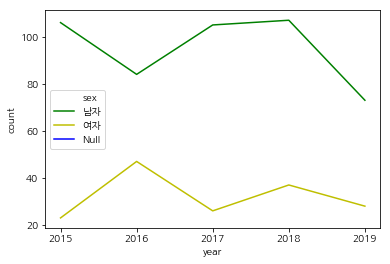

In [330]:
sns.lineplot(x='year', y='count', hue='sex', data = first_writer_sex, palette=['g', 'y', 'b'])

# 영화별 작가 성별 비율 계산

In [303]:
# 영화별 작가 수
writer_sum_by_movie = pd.DataFrame(writers_all.groupby(['movieCd', 'movieNm']).agg({'sex': 'size'}).reset_index())
writer_sum_by_movie = writer_sum_by_movie.rename(columns={'sex': 'number_of_writer'})
writer_sum_by_movie

# 성별에 따른 영화별 작가 수
female = writers_all[writers_all['sex'] == '여자']
male = writers_all[writers_all['sex'] == '남자']

female_writer_sum_by_movie = pd.DataFrame(female.groupby(['movieCd']).agg({'sex': 'size'}).reset_index())
female_writer_sum_by_movie = female_writer_sum_by_movie.rename(columns={'sex': 'number_of_female_writer'})

male_writer_sum_by_movie = pd.DataFrame(male.groupby(['movieCd']).agg({'sex': 'size'}).reset_index())
male_writer_sum_by_movie = male_writer_sum_by_movie.rename(columns={'sex': 'number_of_male_writer'})

# merge
data = writer_sum_by_movie.merge(female_writer_sum_by_movie, how='left', on='movieCd')
writer_sex_ratio = data.merge(male_writer_sum_by_movie, how='left', on='movieCd')

# Null 값이 있다면 계산 안되므로 0으로 바꿔준다
writer_sex_ratio['number_of_female_writer'] = writer_sex_ratio['number_of_female_writer'].fillna(0)
writer_sex_ratio['number_of_male_writer'] = writer_sex_ratio['number_of_male_writer'].fillna(0)

writer_sex_ratio['female_ratio'] = round(writer_sex_ratio['number_of_female_writer'] * 100 / writer_sex_ratio['number_of_writer'], 2)
writer_sex_ratio['male_ratio'] = round(writer_sex_ratio['number_of_male_writer'] * 100 / writer_sex_ratio['number_of_writer'], 2)

writer_sex_ratio.sample()

,movieCd,movieNm,number_of_writer,number_of_female_writer,number_of_male_writer,female_ratio,male_ratio
485,20177005,레슬러,6,4.0,2.0,66.67,33.33


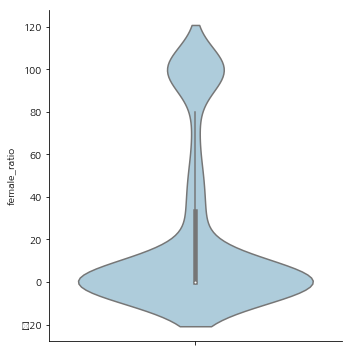

In [251]:
sns.catplot(y='female_ratio', kind='violin', data=writer_sex_ratio, palette='Paired')

여성 작가가 참여하지 않은 작품이 아주 많다

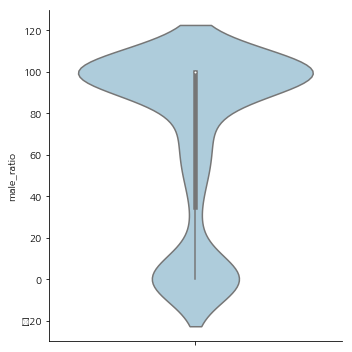

In [223]:
sns.catplot(y='male_ratio', kind='violin', data=writer_sex_ratio, palette='Paired')

반면 남성 작가가 참여하지 않은 작품은 소수

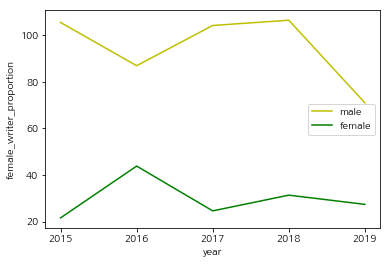

In [311]:
# 혼자 집필했으면 1, 공동집필인 경우 1/N 으로 계산하여 성별 작가 수 산출

data = pd.DataFrame(writer_sex_ratio.groupby('year')['female_ratio'].sum().reset_index())
data['female_writer_proportion'] = data['female_ratio'].apply(lambda x: x / 100)
data1 = pd.DataFrame(writer_sex_ratio.groupby('year')['male_ratio'].sum().reset_index())
data1['male_writer_proportion'] = data1['male_ratio'].apply(lambda x: x / 100)

sns.lineplot(y='male_writer_proportion', x='year', data=data1, color='y', label='male')
sns.lineplot(y='female_writer_proportion', x='year', data=data, color='g', label='female')
plt.legend()
# plt.ylim(0, 600) # 아래의 작가수 전체 합산 그래프와 비교하고 싶으면 ylim 적용해서 y scale 조정

2016 년에 여성작가 수 잠깐 늘었다가 다시 줄어듬
- 위의 첫번째 작가 성비만 가져와서 그린 그래프와 비슷하다

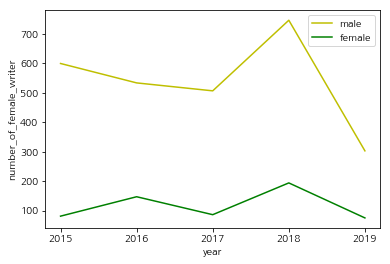

In [310]:
# 성별 작가수 전체 합산

data = pd.DataFrame(writer_sex_ratio.groupby('year')['number_of_female_writer'].sum().reset_index())
data1 = pd.DataFrame(writer_sex_ratio.groupby('year')['number_of_male_writer'].sum().reset_index())

sns.lineplot(y='number_of_male_writer', x='year', data=data1, color='y', label='male')
sns.lineplot(y='number_of_female_writer', x='year', data=data, color='g', label='female')
plt.legend()

집필 인원을 고려하지 않은 전체 작가 성비는 더 큰 차이 난다 (위의 그래프와 y 축 scale 차이 주의)
- 2019 년은 9월까지 데이터만 반영되어 급감하는 것처럼 보임
- 추후 2019년 데이터 추가할 것

In [8]:
print(writer_detail.isnull().sum())
writer_detail.sample()
writer_detail[writer_detail['sex'].isnull()]['peopleCd'].unique()

writer_detail[writer_detail['sex'].isnull()]

writer_detail[writer_detail['sex'].isnull()][['peopleCd', 'peopleNm']].drop_duplicates()

movieCd          0
movieNm          0
moviePartNm      0
peopleCd         0
peopleNm         0
sex            225
dtype: int64


,peopleCd,peopleNm
814,10057072,이인균
904,10045509,애덤 비첸
1033,10066948,조정화
1272,20214806,허선
1952,20229799,니쥔
2125,20227240,여필주
2209,20229601,권초원
2859,20200534,조성희
2994,20215586,천진우
3048,20232049,하영준


In [9]:
writer_detail[writer_detail['peopleCd'] == 10057072]

,movieCd,movieNm,moviePartNm,peopleCd,peopleNm,sex
814,20156807,뽀로로 극장판 컴퓨터 왕국 대모험,시나리오(각본),10057072,이인균,NaN
815,20123681,뽀로로 극장판 슈퍼썰매 대모험,시나리오(각본),10057072,이인균,NaN


In [10]:
writer_code_only = pd.DataFrame(writer_detail['peopleCd'].unique(), columns=['peopleCd'])

writer_code_sex = writer_code_only.merge(writer_detail[['peopleCd', 'peopleNm', 'sex']], how='left', on='peopleCd').drop_duplicates()
writer_code_sex.sample()

,peopleCd,peopleNm,sex
7237,10028435,박경태,남자


In [11]:
writer_code_sex.groupby(['sex'])['peopleNm'].count()

sex
남자    532
여자    205
Name: peopleNm, dtype: int64

각본 공동집필이 많다
- 작품별 한명씩 보고
- 작품별 두명씩 보고

In [12]:
boxoffice.sample()

,순위,영화명,개봉일,매출액,매출액점유율,누적매출액,관객수,누적관객수,스크린수,상영횟수,대표국적,국적,제작사,배급사,등급,장르,감독,배우
662,20,마약왕,2018.12.19,"15,784,724,552",1.7%,"15,784,724,552","1,813,594","1,813,594","1,297","41,658",한국,한국,(주)하이브미디어코프,(주)쇼박스,청소년관람불가,"범죄,드라마",우민호,"송강호,조정석,배두나,김소진,김대명,이희준,조우진,이성민,김홍파,김근영,강민석,강민..."


In [13]:
staffs.sample()

,movieCd,movieNm,peopleNm,staffRoleNm
104067,20177552,국가부도의 날,박준서,사운드팀


In [14]:
staffs[staffs['staffRoleNm'] == '시나리오(각본)'].groupby(['movieCd'])['peopleNm'].count()

# staffs[(staffs['staffRoleNm'] == '시나리오(각본)') & (staffs['movieCd'] == 20100211)]
staffs[(staffs['staffRoleNm'] == '시나리오(각본)') & (staffs['movieCd'] == 20120422)]

,movieCd,movieNm,peopleNm,staffRoleNm
45679,20120422,거미의 땅,김동령,시나리오(각본)
45680,20120422,거미의 땅,박경태,시나리오(각본)


In [15]:
writer_detail[writer_detail['peopleNm'] == '김동령']
writer_detail[writer_detail['peopleNm'] == '박경태']

,movieCd,movieNm,moviePartNm,peopleCd,peopleNm,sex
4758,20190665,임신한 나무와 도깨비,감독,10028435,박경태,남자
4759,20120422,거미의 땅,감독,10028435,박경태,남자
4760,20120422,거미의 땅,시나리오(각본),10028435,박경태,남자
4761,20120422,거미의 땅,편집,10028435,박경태,남자
4762,20120422,거미의 땅,촬영,10028435,박경태,남자
4763,20090349,사당동 더하기 22,감독,10028435,박경태,남자
4764,20090349,사당동 더하기 22,촬영,10028435,박경태,남자
4765,20060444,나와 부엉이,감독,10028435,박경태,남자


In [16]:
boxoffice[boxoffice['영화명'] == '거미의 땅']

,순위,영화명,개봉일,매출액,매출액점유율,누적매출액,관객수,누적관객수,스크린수,상영횟수,대표국적,국적,제작사,배급사,등급,장르,감독,배우
168,179,거미의 땅,2016.1.14,"6,489,100",0.0%,"7,667,100","1,025","1,291",6,113,한국,한국,(주)시네마달,(주)시네마달,15세이상관람가,다큐멘터리,"박경태,김동령",NaN


각본은 순서를 알 수 없음

감독이 각본을 쓴 경우에는 boxoffice 에서 확인가능

In [18]:
# 외국인

# writer_distinct = writer_detail[writer_detail['sex'].isnull()][['peopleCd', 'peopleNm']].drop_duplicates()

# writer_distinct['Korean'] = (len(writer_distinct['peopleNm']) == 3) # 왜 안됨???

# # len(writer_distinct['peopleNm'][814])
# writer_distinct